<a href="https://colab.research.google.com/github/GundaAruna/02-05-2023/blob/main/practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Cocodataset==0.1.2

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip

--2024-02-19 06:39:47--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.198.217, 52.217.113.17, 54.231.128.153, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.198.217|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  55.7MB/s    in 4.7s    

2024-02-19 06:39:52 (51.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip
!unzip /content/train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000259556.jpg  
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/00

In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip /content/val2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/00000011

In [ ]:
!pip install pycocotools

In [ ]:
from pycocotools.coco import COCO

In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
import os
from pickle import dump,load
import json

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

from	tensorflow.keras.layers	import	Embedding,	LSTM,	Dense,Bidirectional, Input, Dropout, Attention

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

from	tensorflow.keras.applications.xception	import	Xception, preprocess_input

from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.utils import to_categorical

#from tensorflow.keras.layers.merge import add

In [ ]:
from keras.layers import concatenate
from keras.layers import add
from tensorflow.keras.models import Model, load_model


from tqdm.notebook import tqdm

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
coco = COCO("/content/annotations/instances_train2017.json")

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '/content/annotations/instances_train2017.json'

In [ ]:
cats = coco.loadCats(coco.getCatIds())
maincategories = list(set([cat['supercategory'] for cat in cats]))

print("Number of main cateogeries:" , len(maincategories))
print("List of main categories:" , maincategories)

Number of main cateogeries: 12
List of main categories: ['animal', 'vehicle', 'electronic', 'kitchen', 'outdoor', 'food', 'accessory', 'furniture', 'person', 'indoor', 'appliance', 'sports']


In [ ]:
subcategories = [cat['name'] for cat in cats]
print("Number of main cateogeries:" , len(subcategories))
print("List of main categories:" , subcategories)

Number of main cateogeries: 80
List of main categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
catIds = coco.getCatIds(catNms=subcategories)
subcategories_Ids = dict()
for i in range(0,len(subcategories)):
    subcategories_Ids[subcategories[i]] = catIds[i]

print("Sub categories with IDs :",subcategories_Ids)

Sub categories with IDs : {'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 13, 'parking meter': 14, 'bench': 15, 'bird': 16, 'cat': 17, 'dog': 18, 'horse': 19, 'sheep': 20, 'cow': 21, 'elephant': 22, 'bear': 23, 'zebra': 24, 'giraffe': 25, 'backpack': 27, 'umbrella': 28, 'handbag': 31, 'tie': 32, 'suitcase': 33, 'frisbee': 34, 'skis': 35, 'snowboard': 36, 'sports ball': 37, 'kite': 38, 'baseball bat': 39, 'baseball glove': 40, 'skateboard': 41, 'surfboard': 42, 'tennis racket': 43, 'bottle': 44, 'wine glass': 46, 'cup': 47, 'fork': 48, 'knife': 49, 'spoon': 50, 'bowl': 51, 'banana': 52, 'apple': 53, 'sandwich': 54, 'orange': 55, 'broccoli': 56, 'carrot': 57, 'hot dog': 58, 'pizza': 59, 'donut': 60, 'cake': 61, 'chair': 62, 'couch': 63, 'potted plant': 64, 'bed': 65, 'dining table': 67, 'toilet': 70, 'tv': 72, 'laptop': 73, 'mouse': 74, 'remote': 75, 'keyboard': 76, 'c

In [ ]:
subcategories_imageIds = dict()

for i in range(0,len(catIds)):
  imgIds = coco.getImgIds(catIds = catIds[i])
  img = []
  for j in imgIds:
    img.append(j)

  subcategories_imageIds[subcategories[i]] = img

  print("sub categories with image Ids :" , len(subcategories_imageIds))

sub categories with image Ids : 1
sub categories with image Ids : 2
sub categories with image Ids : 3
sub categories with image Ids : 4
sub categories with image Ids : 5
sub categories with image Ids : 6
sub categories with image Ids : 7
sub categories with image Ids : 8
sub categories with image Ids : 9
sub categories with image Ids : 10
sub categories with image Ids : 11
sub categories with image Ids : 12
sub categories with image Ids : 13
sub categories with image Ids : 14
sub categories with image Ids : 15
sub categories with image Ids : 16
sub categories with image Ids : 17
sub categories with image Ids : 18
sub categories with image Ids : 19
sub categories with image Ids : 20
sub categories with image Ids : 21
sub categories with image Ids : 22
sub categories with image Ids : 23
sub categories with image Ids : 24
sub categories with image Ids : 25
sub categories with image Ids : 26
sub categories with image Ids : 27
sub categories with image Ids : 28
sub categories with image Ids

In [ ]:
length_dict = {key:len(value) for key, value in subcategories_imageIds.items()}
print("Total images in each sub categories: ", length_dict)

Total images in each sub categories:  {'person': 64115, 'bicycle': 3252, 'car': 12251, 'motorcycle': 3502, 'airplane': 2986, 'bus': 3952, 'train': 3588, 'truck': 6127, 'boat': 3025, 'traffic light': 4139, 'fire hydrant': 1711, 'stop sign': 1734, 'parking meter': 705, 'bench': 5570, 'bird': 3237, 'cat': 4114, 'dog': 4385, 'horse': 2941, 'sheep': 1529, 'cow': 1968, 'elephant': 2143, 'bear': 960, 'zebra': 1916, 'giraffe': 2546, 'backpack': 5528, 'umbrella': 3968, 'handbag': 6841, 'tie': 3810, 'suitcase': 2402, 'frisbee': 2184, 'skis': 3082, 'snowboard': 1654, 'sports ball': 4262, 'kite': 2261, 'baseball bat': 2506, 'baseball glove': 2629, 'skateboard': 3476, 'surfboard': 3486, 'tennis racket': 3394, 'bottle': 8501, 'wine glass': 2533, 'cup': 9189, 'fork': 3555, 'knife': 4326, 'spoon': 3529, 'bowl': 7111, 'banana': 2243, 'apple': 1586, 'sandwich': 2365, 'orange': 1699, 'broccoli': 1939, 'carrot': 1683, 'hot dog': 1222, 'pizza': 3166, 'donut': 1523, 'cake': 2925, 'chair': 12774, 'couch': 44

In [ ]:
train_cats = subcategories_imageIds['bicycle'] + subcategories_imageIds['airplane']
imgIdss = coco.getImgIds (imgIds = train_cats)

print("Total Images: ", len(imgIdss))

Total Images:  6221


In [ ]:
import random

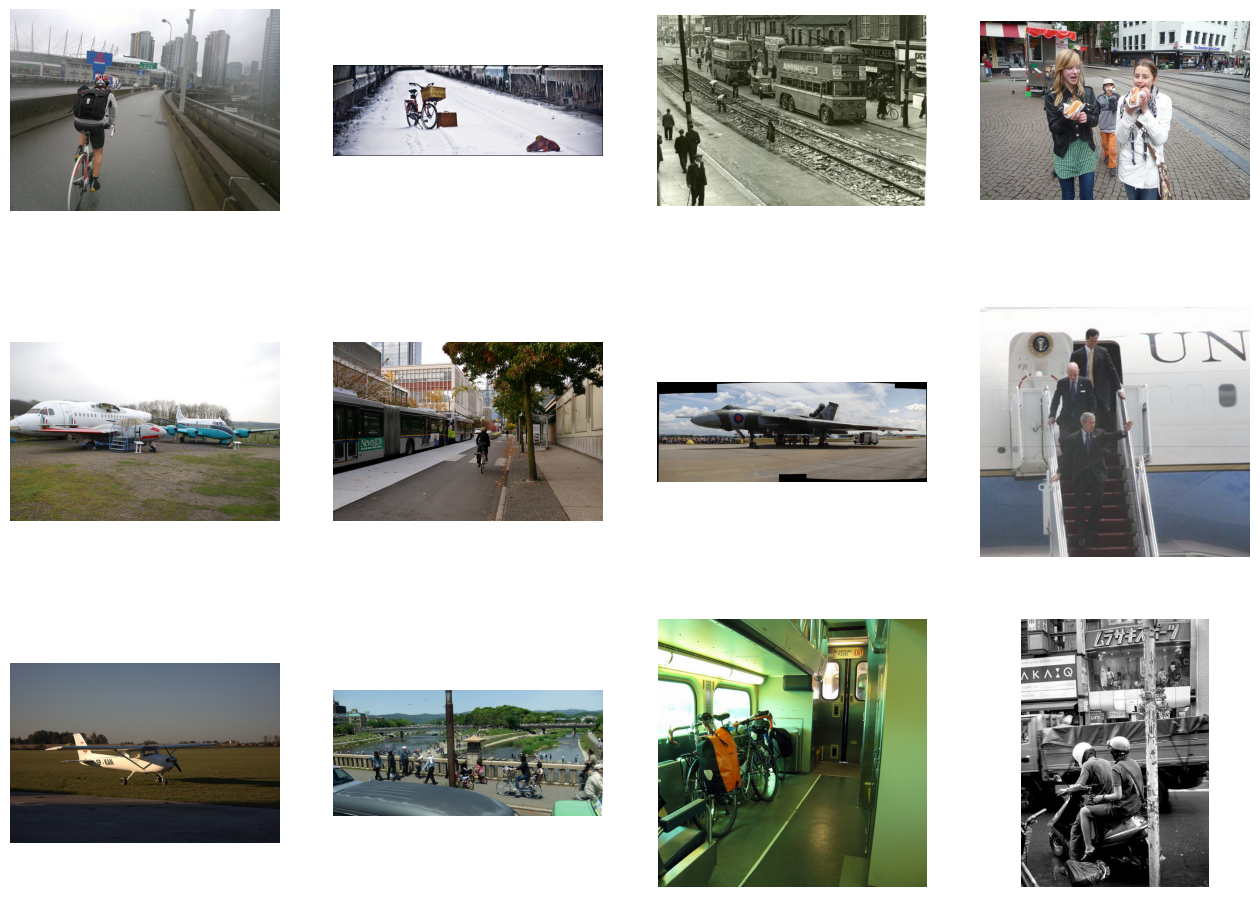

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix = imgIdss
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):

   sp = plt.subplot(4, 4, i + 1)
   sp.axis('Off')

   img= coco.loadImgs(img_path)[0]
   I = io.imread(img['coco_url'])
   plt.imshow(I)

plt.show()

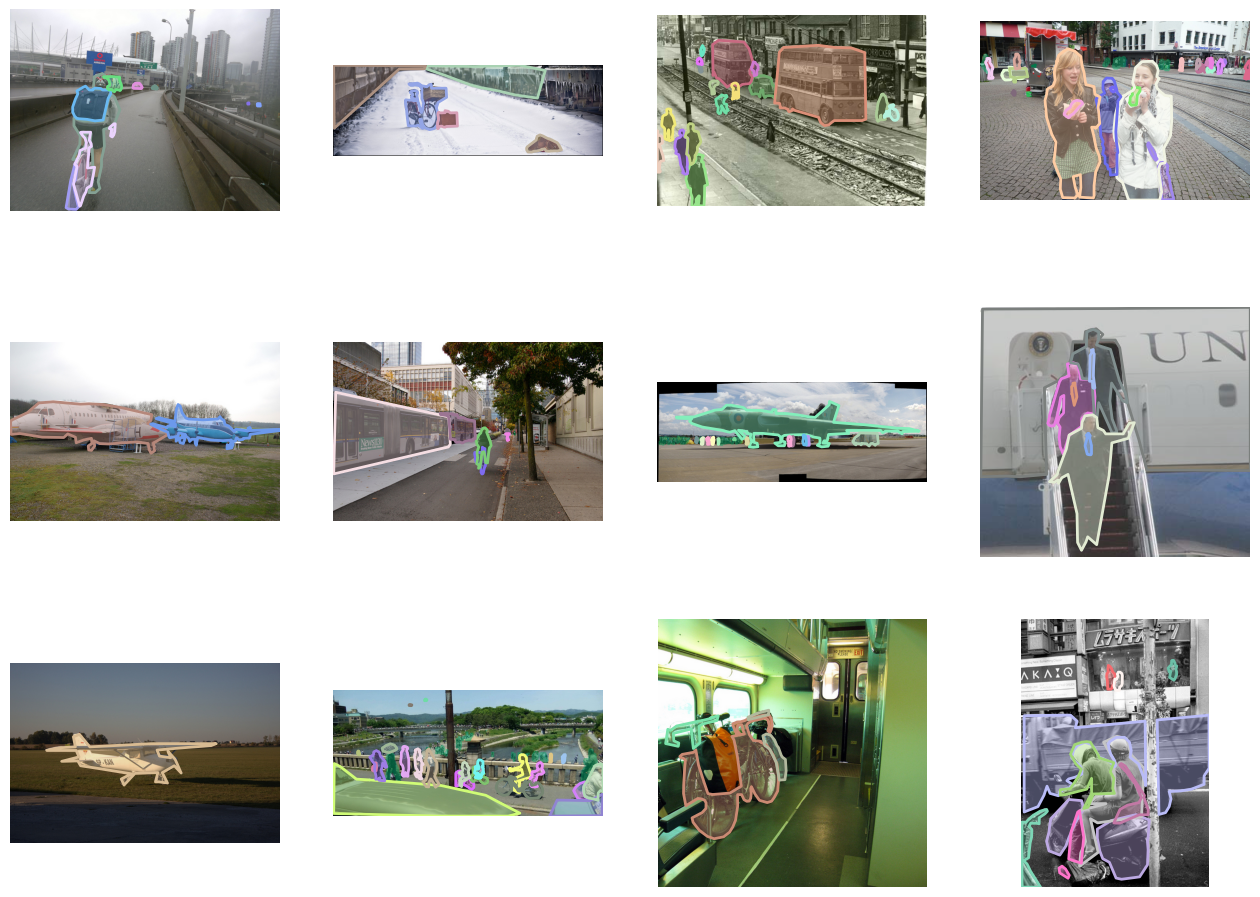

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

for i, img_path in enumerate(next_pix[0:12]):
   sp = plt.subplot(4, 4, i + 1)
   sp.axis('Off')

   img = coco.loadImgs(img_path)[0]
   I = io.imread(img['coco_url'])
   plt.imshow(I)
   annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
   anns = coco.loadAnns(annIds)
# print(anns)
   coco.showAnns(anns)


plt.show()

In [ ]:
annFile = ("/content/annotations/person_keypoints_train2017.json")
coco_kps = COCO(annFile)

loading annotations into memory...
Done (t=16.04s)
creating index...
index created!


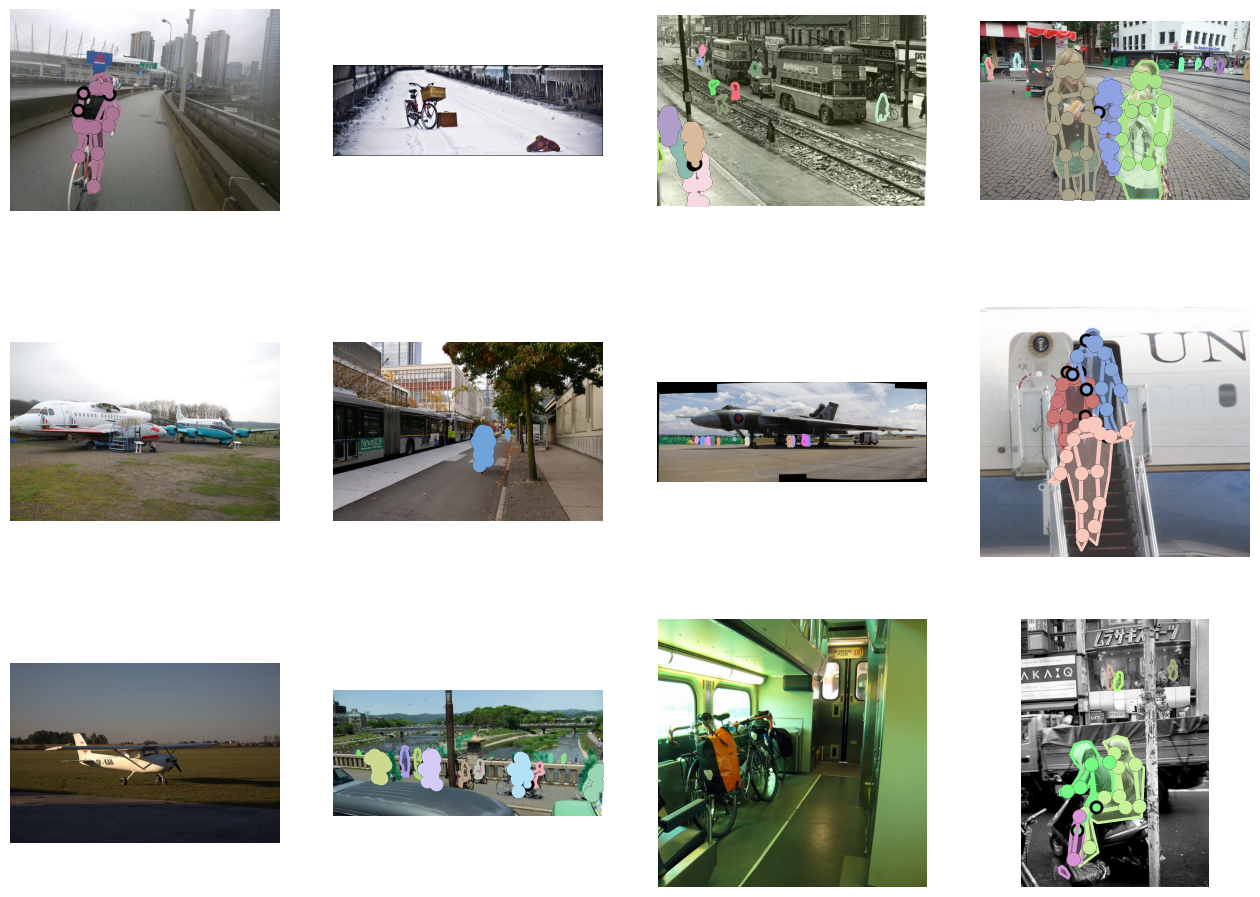

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

for i, img_path in enumerate(next_pix[0:12]):

   sp = plt.subplot(4, 4, i + 1)
   sp.axis('Off')

   img = coco.loadImgs(img_path)[0]
   I = io.imread(img['coco_url'])
   plt.imshow(I)
   annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
   anns = coco_kps.loadAnns(annIds)
   coco_kps.showAnns(anns)

plt.show()

In [ ]:
annFile = "/content/annotations/captions_train2017.json"
coco_caps = COCO(annFile)

loading annotations into memory...
Done (t=1.87s)
creating index...
index created!


a man that is riding his bake on a bridge
A person is riding a bicycle on the side of a bridge.
A cyclist riding toward a city on the freeway.
A man with a backpack is riding a bike on a sidewalk.
Man on bicycle with backpack traveling on street.


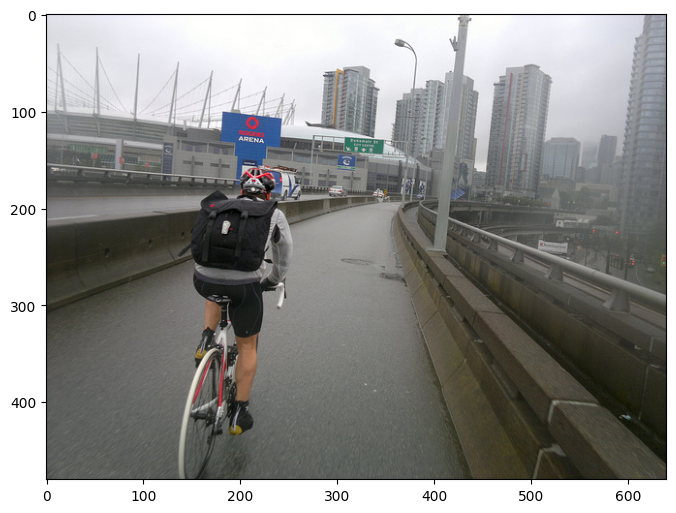

In [ ]:
img = coco.loadImgs(next_pix[0])[0]
I = io.imread(img['coco_url'])
plt.imshow(I)
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.show()

A bike with a basket sitting on snow covered ground.
A bicycle with a basket is parked on a snowy path.
a bike with a basket parked on a snowy surface
A snow covered road with a bicycle in the middle.
A BIKE IS ON THE STREET WITH A LOT OF SNOW


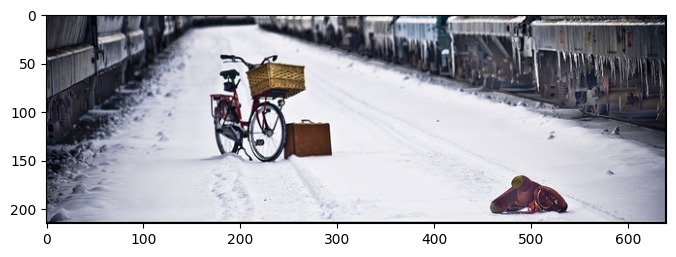

In [ ]:
img = coco.loadImgs(next_pix[1])[0]
I = io.imread(img['coco_url'])
plt.imshow(I)
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.show()

A group of bicycles on a subway train.
Bikes are sitting against seats in a train car.
A couple of bikes parked inside of a train.
Bicycles sit solidarity on a train car against the window
A bike parked on a subway bus car.


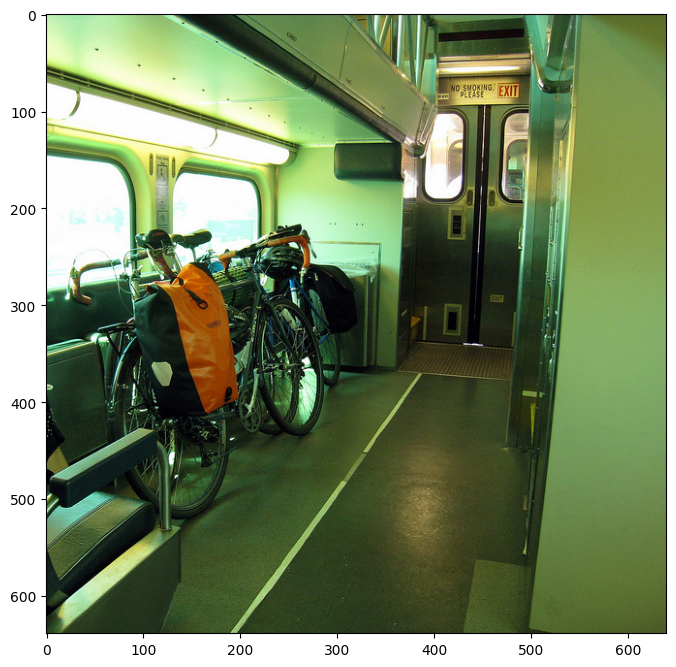

In [ ]:
img = coco.loadImgs(next_pix[10])[0]
I = io.imread(img['coco_url'])
plt.imshow(I)
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.show()

In [ ]:
print("total images for training :", len(imgIdss))

total images for training : 6221


In [ ]:
import tensorflow
import string

In [ ]:
dataset = dict()
imgcaptions = []

for imgid in imgIdss:
    img = coco.loadImgs(imgid)[0]
    annIds = coco_caps.getAnnIds(imgIds=img['id']); anns = coco_caps.loadAnns(annIds)
    imgcaptions = []
    for cap in anns:

            # Remove punctuation
           cap = cap['caption'].translate(str.maketrans('', '', string.punctuation))

            # Replace - to blank
           cap = cap.replace("-"," ")



            # Split string into word list and Convert each word into lower case

           cap = cap.split()
           cap = [word.lower() for word in cap]

# join word list into sentence and <start> and <end> tag to each sentence which helps
# LSTM encoder-decoder model while training.

           cap = '<start> ' + " ".join(cap) + ' <end>'
           imgcaptions.append(cap)

           dataset[img['coco_url']] = imgcaptions


print("Length of Dataset: ",len(dataset))
print(dataset['http://images.cocodataset.org/train2017/000000047084.jpg'])
#dataset

Length of Dataset:  6221
['<start> a jumbo jet plane connected to a boarding deck <end>', '<start> a large blue passenger plane sits on the tarmac at the airport <end>', '<start> a blue commercial airplane parked at a jet way <end>', '<start> a large airplane that is sitting out on the runway <end>', '<start> a blue plane at the airport being offloaded <end>']


In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(dataset.values())) #[[1,3],[4,8]] = [1,3,4,8]

tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(flatten_list)
total_words = len(tokenizer.word_index) + 1

print("Vocabulary length: ", total_words)
print("Bicycle ID: ", tokenizer.word_index['bicycle'])
print("Airplane ID: ", tokenizer.word_index['airplane'])

from itertools import chain
flatten_list = list(chain.from_iterable(dataset.values())) #[[1,3],[4,8]] = [1,3,4,8]

tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(flatten_list)
total_words = len(tokenizer.word_index) + 1

print("Vocabulary length: ", total_words)
print("Bicycle ID: ", tokenizer.word_index['bicycle'])
print("Airplane ID: ", tokenizer.word_index['airplane'])

In [ ]:
import json

In [ ]:
model = Xception(include_top=False, pooling='avg')

image_features = {}

for img in tqdm(dataset.keys()):
    image = io.imread(img)
    if image.ndim != 3:
        image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)

    # Resize each image size 299 x 299
    image = cv2.resize(image,(299,299))
    image = np.expand_dims(image, axis=0)

    # Normalize image pixels
    image = image/127.5
    image = image - 1.0

    # Extract features from image
    feature = model.predict(image)
    image_features[img] = feature

print("Image features length: ", len(image_features))

83683744/83683744 [==============================] - 1s 0us/step


  0%|          | 0/6221 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 689ms/step
Image features length:  6221


In [ ]:
image_features['http://images.cocodataset.org/train2017/000000042977.jpg'].shape

NameError: name 'image_features' is not defined

In [ ]:
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)

max_length = max_length(dataset)
max_length

46

In [ ]:
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():

            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield ([input_image, input_sequence], output_word)


def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()

    # walk through each description for the image
    for desc in desc_list:

        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]

        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):

            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]

            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]

            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=total_words)[0]

            # store
            X1.append(feature) # image features
            X2.append(in_seq)  # Caption input
            y.append(out_seq)  # Caption output

    return np.array(X1), np.array(X2), np.array(y)

In [ ]:
from keras.utils import plot_model

# define the captioning model
def define_model(total_words, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(total_words, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(total_words, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

In [ ]:
# train our model
print('Dataset: ', len(dataset))
print('Descriptions: train=', len(dataset))
print('Photos: train=', len(image_features))
print('Vocabulary Size:', total_words)
print('Description Length: ', max_length)

model = define_model(total_words, max_length)
epochs=1
steps = len(dataset)

# making a directory models to save our models
import os
os.mkdir("models")

for i in range(epochs):
    generator = data_generator(dataset, image_features, tokenizer, max_length)
    model.fit(generator, epochs=5, steps_per_epoch= steps, verbose=1)
    model.save("models/model_" + str(i) + ".h5")

Dataset:  6221
Descriptions: train= 6221
Photos: train= 6221
Vocabulary Size: 6410
Description Length:  46
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 46)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 46, 256)              1640960   ['input_3[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 2048)                 0         ['input_2[0][0]'] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("models/model_0.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img_paths = ["../content/val2017/000000001761.jpg",
             "../content/val2017/000000022396.jpg" ,
             "../content/val2017/000000098520.jpg" ,
             "../content/val2017/000000101762.jpg" ,
             "../content/val2017/000000224051.jpg",
             "../content/val2017/000000513181.jpg",
             "../content/val2017/000000212226.jpg",
             ]
def extract_features(filename, model):
  try:
     image = Image.open(filename)
  except:
        print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
  image = image.resize((299,299))
  image = np.array(image)
  # for images that has 4 channels, we convert them into 3 channels
  if image.shape[2] == 4:
    image = image[..., :3]
  image = np.expand_dims(image, axis=0)
  image = image/127.5
  image = image - 1.0
  feature = model.predict(image)
  return feature
def word_for_id(integer, tokenizer):
  for word, index in tokenizer.word_index.items():
    if index == integer:
      return word
  return None
def generate_desc(model, tokenizer, photo, max_length):
  in_text = 'start'
  for i in range(max_length):
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], maxlen=max_length)
    pred = model.predict([photo,sequence], verbose=0)
    pred = np.argmax(pred)
    word = word_for_id(pred, tokenizer)
    if word is None:
      break
    in_text += ' ' + word
    if word == 'end':
      break
  return in_text
#max_length = 46
#model = load_model('./models/model_0.h5')
xception_model = Xception(include_top=False, pooling="avg")
photo = extract_features(img_paths[0], xception_model)
img = Image.open(img_paths[0])
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)


NameError: name 'Xception' is not defined

1/1 [==============================] - 1s 613ms/step



start a plane flying in the sky with a sky background end


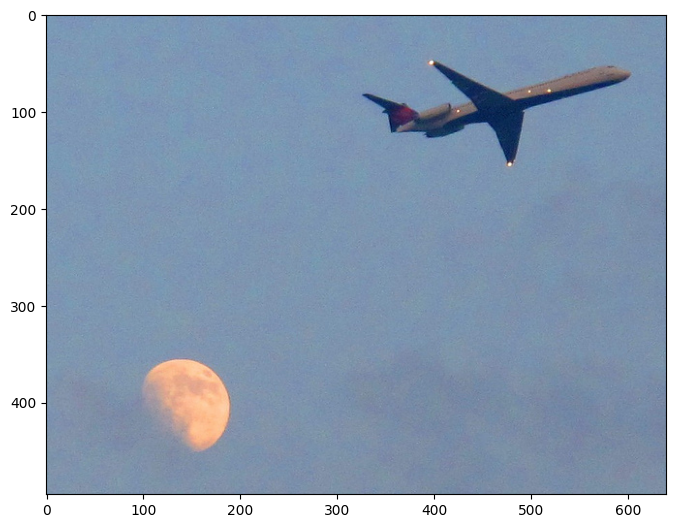

In [ ]:
photo = extract_features(img_paths[1], xception_model)
img = Image.open(img_paths[1])
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 0s 332ms/step



start a large jetliner sitting on top of an airport tarmac end


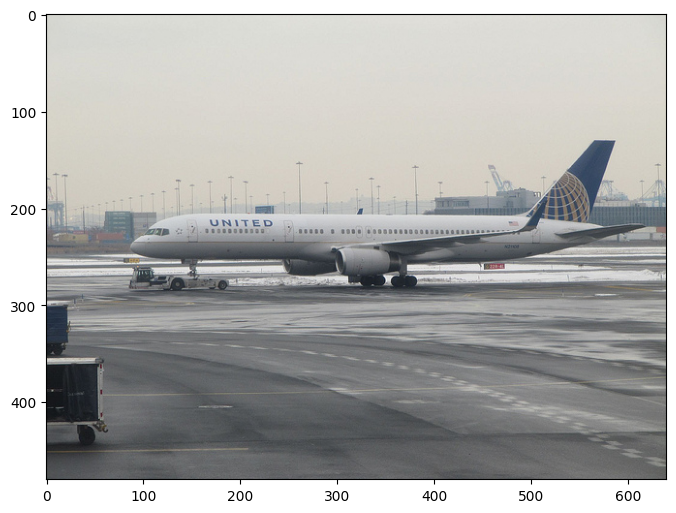

In [ ]:
photo = extract_features(img_paths[2], xception_model)
img = Image.open(img_paths[2])
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)


1/1 [==============================] - 0s 314ms/step



start a bike parked in front of a building with a bicycle leaning against it end


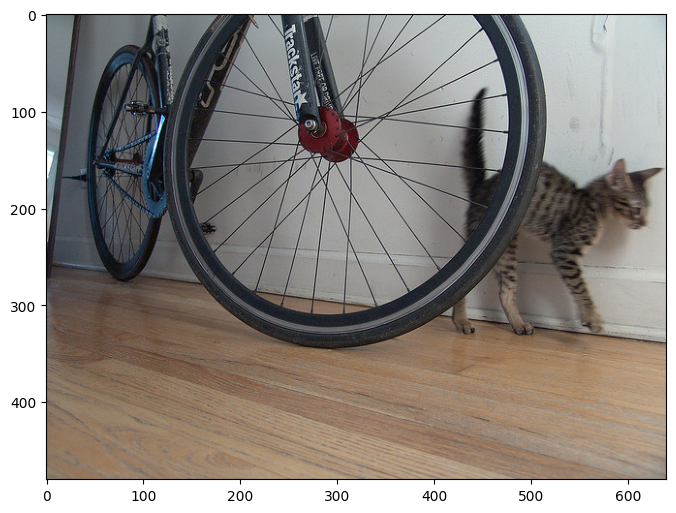

In [ ]:
photo = extract_features(img_paths[3], xception_model)
img = Image.open(img_paths[3])
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 1s 538ms/step



start a bike parked on the side of the road end


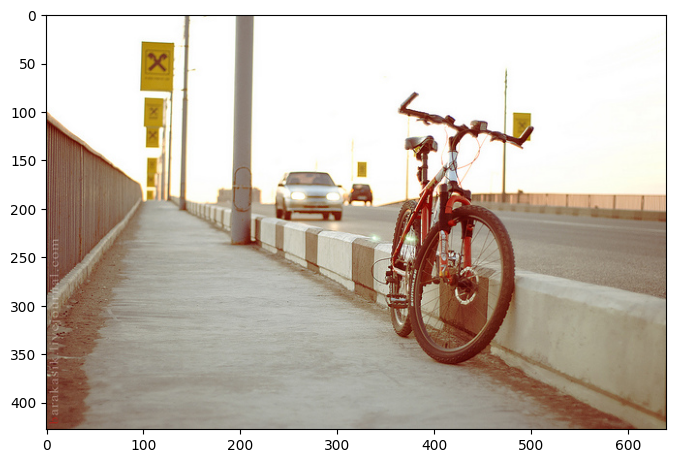

In [ ]:
photo = extract_features(img_paths[4], xception_model)
img = Image.open(img_paths[4])
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)


1/1 [==============================] - 0s 344ms/step



start a boat in the water with a boat in the background end


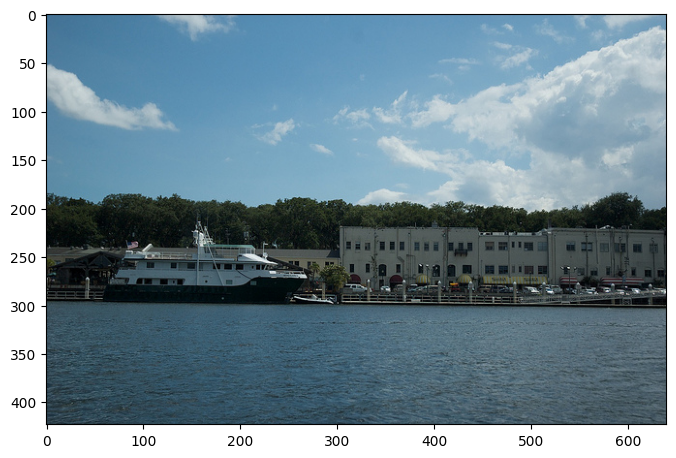

In [ ]:
photo = extract_features(img_paths[5], xception_model)
img = Image.open(img_paths[5])
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)